In [271]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [227]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

In [228]:
data = requests.get(url).text

In [229]:
soup = BeautifulSoup(data,"html.parser")

In [230]:
table = soup.find_all('table') # in html table is represented by the tag <table>

In [231]:
tesla_av_rev = pd.DataFrame(columns=["Date","Tesla Annual Revenue (Millions of USD)"])
tesla_qt_rev = pd.DataFrame(columns=["Date","Tesla Quarterly Revenue (Millions of USD)"])

In [232]:
for row in table[0].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        ann_rev = col[1].text
        tesla_av_rev = tesla_av_rev.append({"Date":date,"Tesla Annual Revenue (Millions of USD)":ann_rev},ignore_index=True)


In [233]:
for row in table[1].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        qtr_rev = col[1].text
        tesla_qt_rev = tesla_qt_rev.append({"Date":date,"Tesla Quarterly Revenue (Millions of USD)":qtr_rev},ignore_index=True)


In [234]:
tesla_qt_rev["Tesla Quarterly Revenue (Millions of USD)"].replace("",np.nan,inplace=True)

In [235]:
tesla_qt_rev = tesla_qt_rev.dropna()

In [236]:
tesla_av_rev["Tesla Annual Revenue (Millions of USD)"] = tesla_av_rev["Tesla Annual Revenue (Millions of USD)"].str.replace("[$,\,]", "", regex=True)

In [237]:
tesla_qt_rev["Tesla Quarterly Revenue (Millions of USD)"] = tesla_qt_rev["Tesla Quarterly Revenue (Millions of USD)"].str.replace("[$,\,]", "", regex=True)

In [238]:
tesla_qt_rev.tail()

,Date,Tesla Quarterly Revenue (Millions of USD)
44,2010-09-30,31
45,2010-06-30,28
46,2010-03-31,21
48,2009-09-30,46
49,2009-06-30,27


In [239]:
tesla_av_rev["Tesla Annual Revenue (Millions of USD)"] = tesla_av_rev["Tesla Annual Revenue (Millions of USD)"].astype(int) 

In [252]:
tesla_qt_rev["Date"] = tesla_qt_rev["Date"].astype('datetime64[ns]')

In [241]:
tesla_av_rev = tesla_av_rev.sort_values(by=['Tesla Annual Revenue (Millions of USD)'])

,Date,Tesla Quarterly Revenue (Millions of USD)
0,2021-09-30,13757
1,2021-06-30,11958
2,2021-03-31,10389
3,2020-12-31,10744
4,2020-09-30,8771


In [255]:
tesla_qt_rev = tesla_qt_rev.sort_values(by=['Date'],ascending=False)

<AxesSubplot:title={'center':'Tesla Annual Revenue'}, xlabel='Year'>

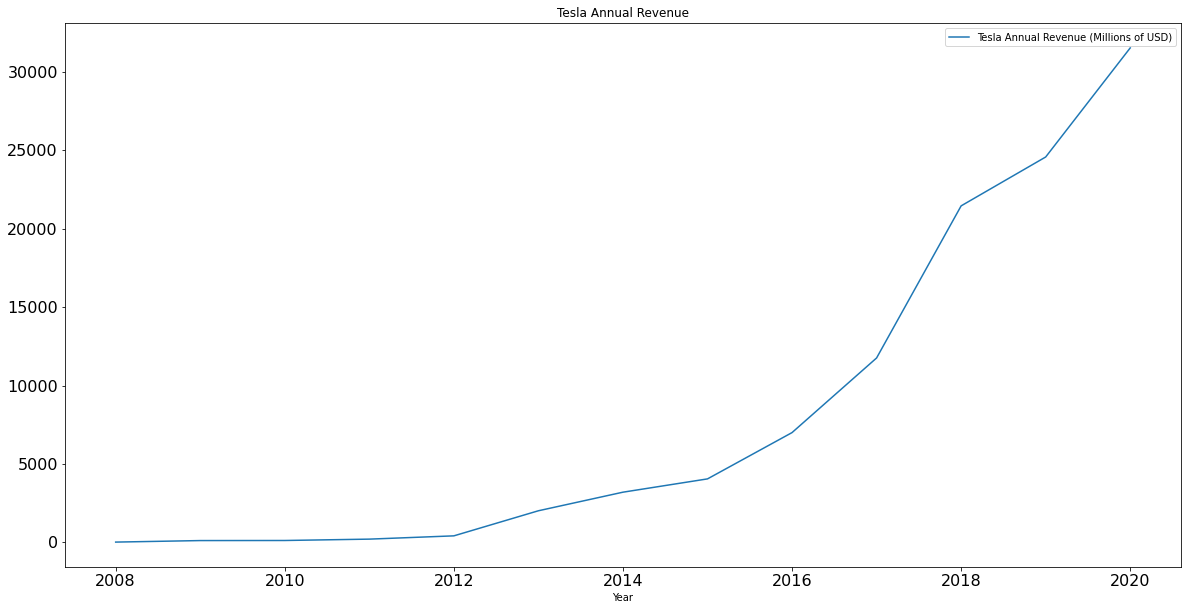

In [269]:
tesla_av_rev.plot(x="Date",y="Tesla Annual Revenue (Millions of USD)",legend=True,title="Tesla Annual Revenue",xlabel="Year",figsize=(20,10),fontsize=16)

<AxesSubplot:title={'center':'Tesla Quarterly Revenue'}, xlabel='Year'>

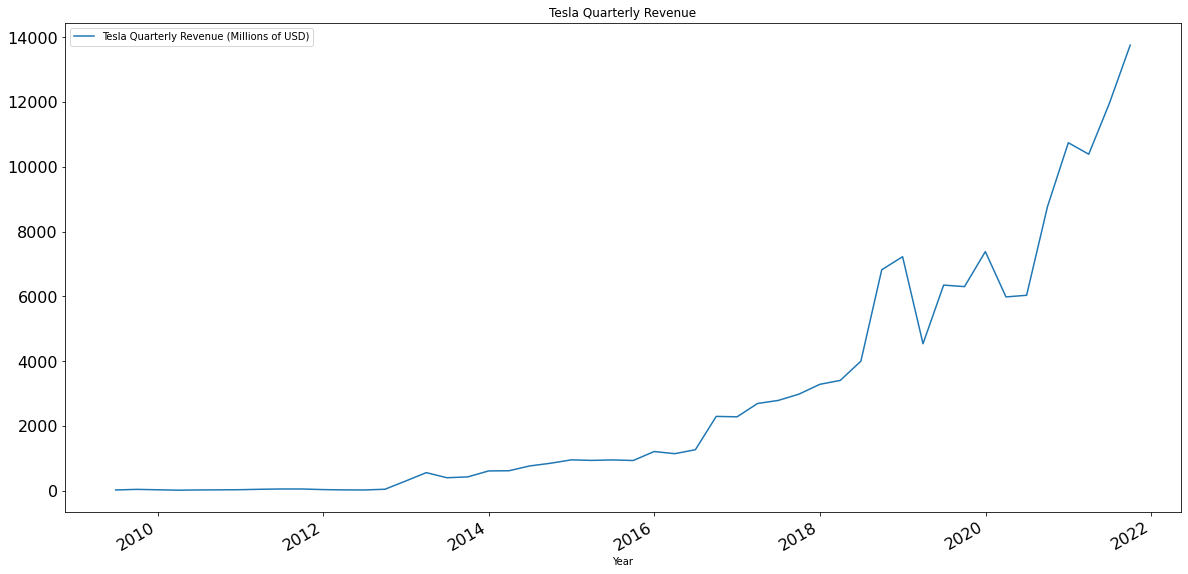

In [270]:
tesla_qt_rev.plot(x="Date",y="Tesla Quarterly Revenue (Millions of USD)",legend=True,title="Tesla Quarterly Revenue",xlabel="Year",figsize=(20,10),fontsize=16)

In [245]:
tesla_qt_rev

,Date,Tesla Quarterly Revenue (Millions of USD)
0,2021-09-30,13757
1,2021-06-30,11958
2,2021-03-31,10389
3,2020-12-31,10744
4,2020-09-30,8771
5,2020-06-30,6036
6,2020-03-31,5985
7,2019-12-31,7384
8,2019-09-30,6303
9,2019-06-30,6350


In [313]:
def make_graph(x,y,title,xlab,ylab):
    plt.figure(figsize=(9, 6))
    plt.plot(x,y)
    plt.title(title,fontsize=16)
    plt.xlabel(xlab,fontsize=16)
    plt.ylabel(ylab,fontsize=16)

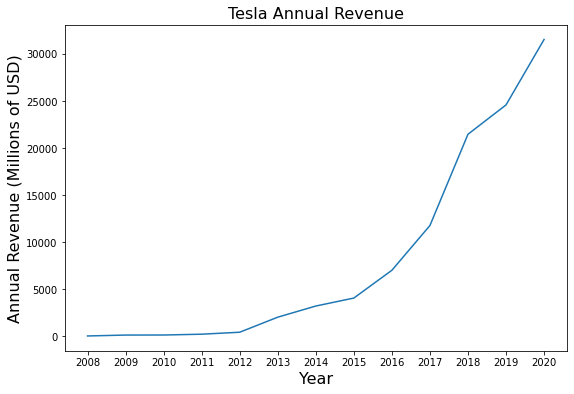

In [314]:
make_graph(tesla_av_rev["Date"],tesla_av_rev["Tesla Annual Revenue (Millions of USD)"],
           "Tesla Annual Revenue","Year","Annual Revenue (Millions of USD)")

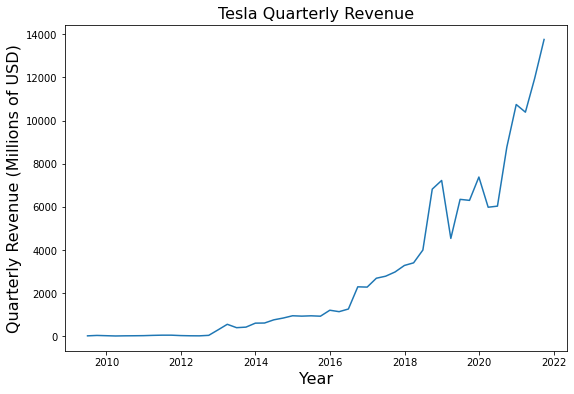

In [312]:
make_graph(tesla_qt_rev["Date"],tesla_qt_rev["Tesla Quarterly Revenue (Millions of USD)"],
           "Tesla Quarterly Revenue","Year","Quarterly Revenue (Millions of USD)")